In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
startups=pd.read_csv('50_Startups.csv')
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startups.shape

(50, 5)

In [6]:
df=startups.drop('State', axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

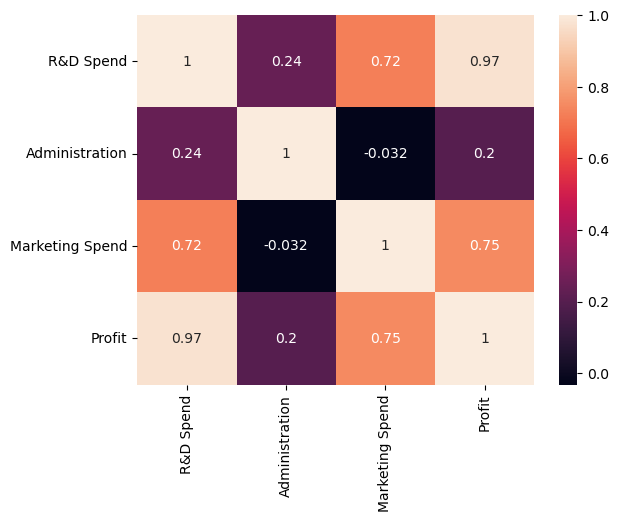

In [8]:
sns.heatmap(df.corr(),annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


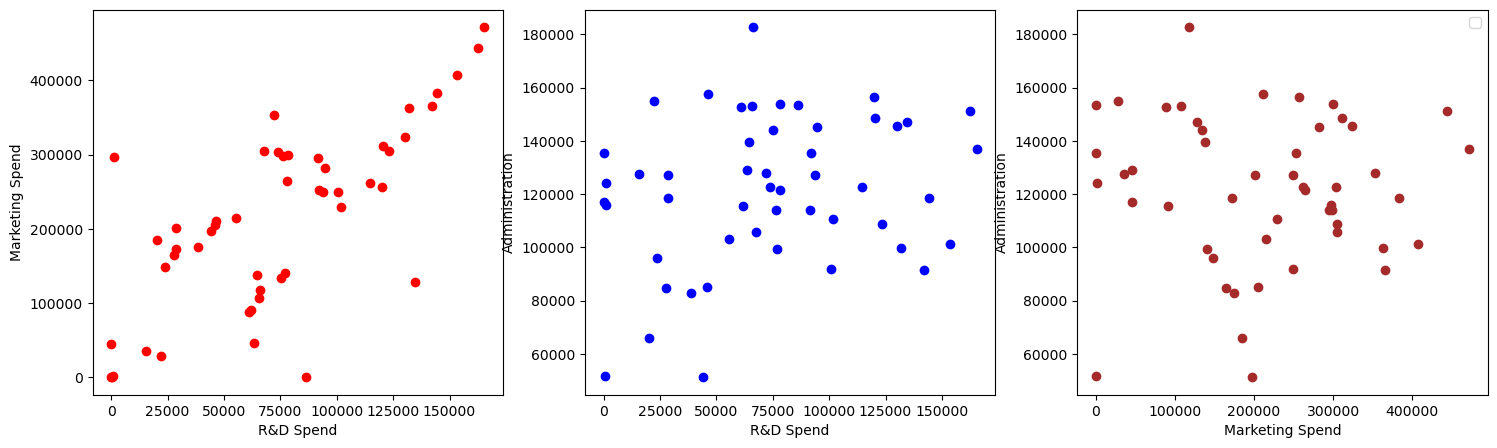

In [9]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['R&D Spend'],df['Marketing Spend'],color='red',label='Correlation 72%')
plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.subplot(1,3,2)
plt.scatter(df['R&D Spend'],df['Administration'],color='blue',label='Correlation=24%')
plt.xlabel('R&D Spend')
plt.ylabel('Administration')
plt.subplot(1,3,3)
plt.scatter(df['Marketing Spend'],df['Administration'],color='brown')
plt.xlabel('Marketing Spend')
plt.ylabel('Administration')
plt.legend(loc='best')

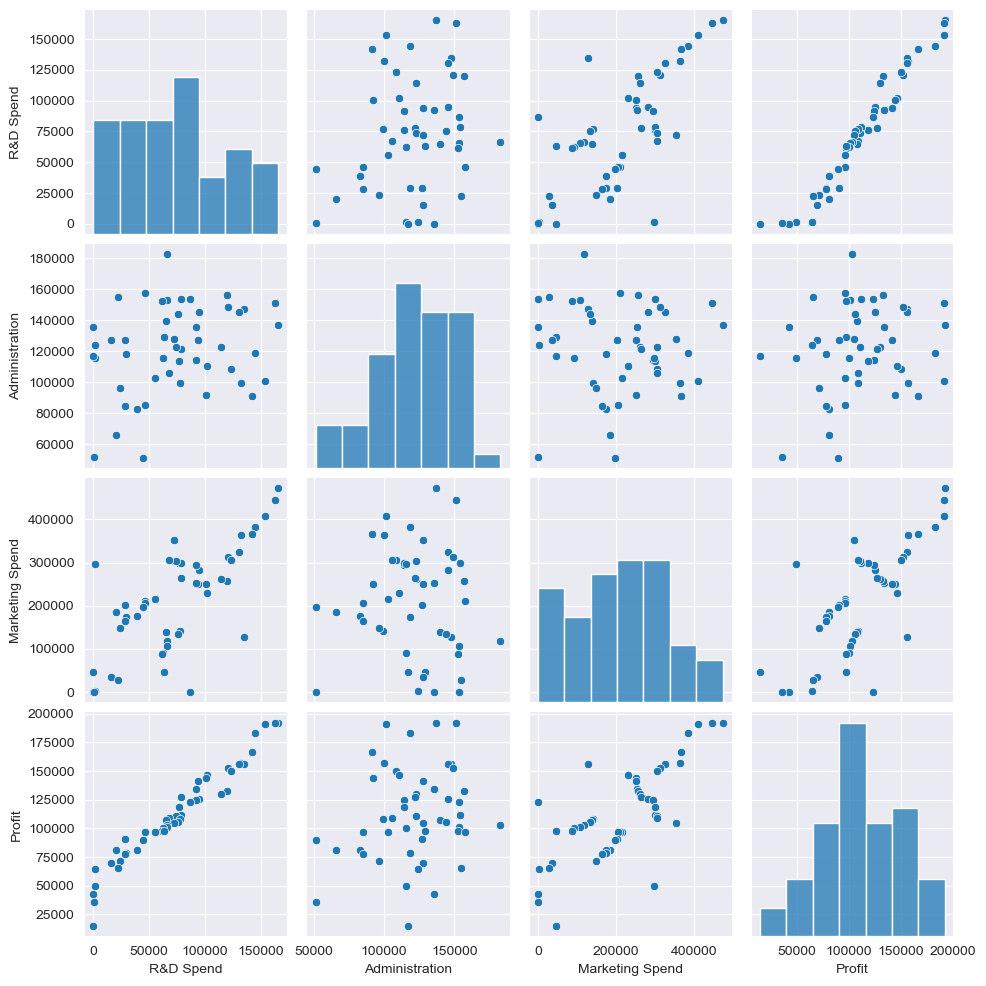

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [11]:
df_1=df.rename({'R&D Spend':'R_D','Marketing Spend':'Marketing_spend'},axis=1)
df_1.head()

,R_D,Administration,Marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [12]:
model=smf.ols('Profit~R_D+Administration+Marketing_spend',data=df_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.53e-30
Time:                        20:22:34   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_D                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept          50122.192990
R_D                    0.805715
Administration        -0.026816
Marketing_spend        0.027228
dtype: float64

In [14]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [15]:
rsq_RDS=smf.ols('R_D~Administration+Marketing_spend',data=df_1).fit().rsquared
vif_RDS=1/(1-rsq_RDS)

rsq_Admin=smf.ols('Administration~R_D+Marketing_spend',data=df_1).fit().rsquared
vif_Admin=1/(1-rsq_Admin)

rsq_Market=smf.ols('Marketing_spend~R_D+Administration',data=df_1).fit().rsquared
vif_Market=1/(1-rsq_Market)

In [16]:
d2 = {'Variables':['R_D','Administration','Marketing_spend'],'VIF':[vif_RDS,vif_Admin,vif_Market]}
Vif_frame = pd.DataFrame(d2)  
Vif_frame

,Variables,VIF
0,R_D,2.468903
1,Administration,1.175091
2,Marketing_spend,2.326773


# Treatment for multicollinearity

In [17]:
model_1=smf.ols('Profit~R_D+Administration',data=df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           7.29e-31
Time:                        20:22:34   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
R_D                0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model_2=smf.ols('Profit~R_D+Marketing_spend',data=df_1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.16e-31
Time:                        20:22:34   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R_D                 0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_3=smf.ols('Profit~Administration+Marketing_spend',data=df_1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.50e-10
Time:                        20:22:34   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([ 1.,  0.,  0.,  3.,  1., 12., 15.,  6.,  9.,  3.]),
 array([-33533.7341113 , -28452.81766886, -23371.90122642, -18290.98478398,
        -13210.06834154,  -8129.1518991 ,  -3048.23545666,   2032.68098578,
          7113.59742822,  12194.51387065,  17275.43031309]),
 <BarContainer object of 10 artists>)

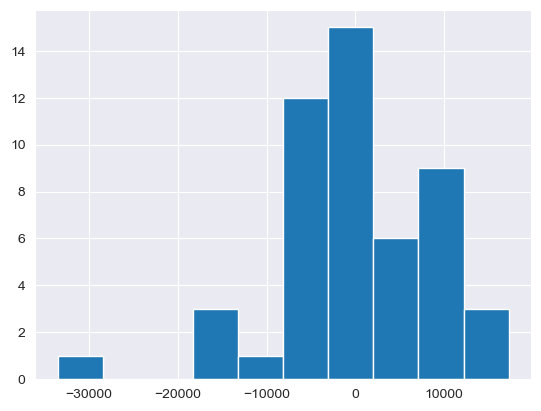

In [20]:
plt.hist(model.resid,bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x21940e62c40>,
 'caps': [<matplotlib.lines.Line2D at 0x21940e72220>,
 'boxes': [<matplotlib.lines.Line2D at 0x21940e629d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21940e727c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21940e72a90>],
 'means': []}

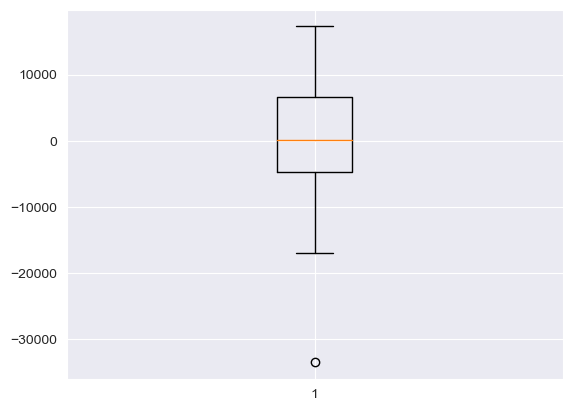

In [21]:
plt.boxplot(model.resid)

Text(0.5, 1.0, 'Normal Q-Q Plot')

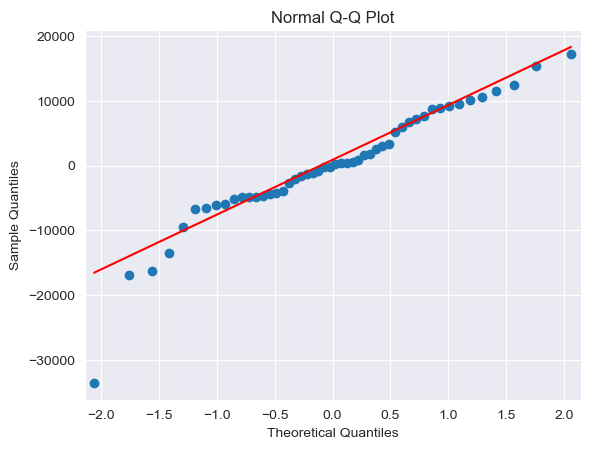

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot')

# Residual Plot for Homoscadasticity

In [23]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

Text(0, 0.5, 'Standardized residual values')

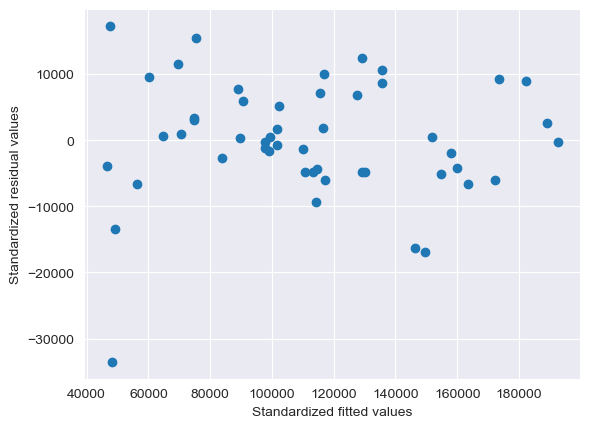

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

eval_env: 1


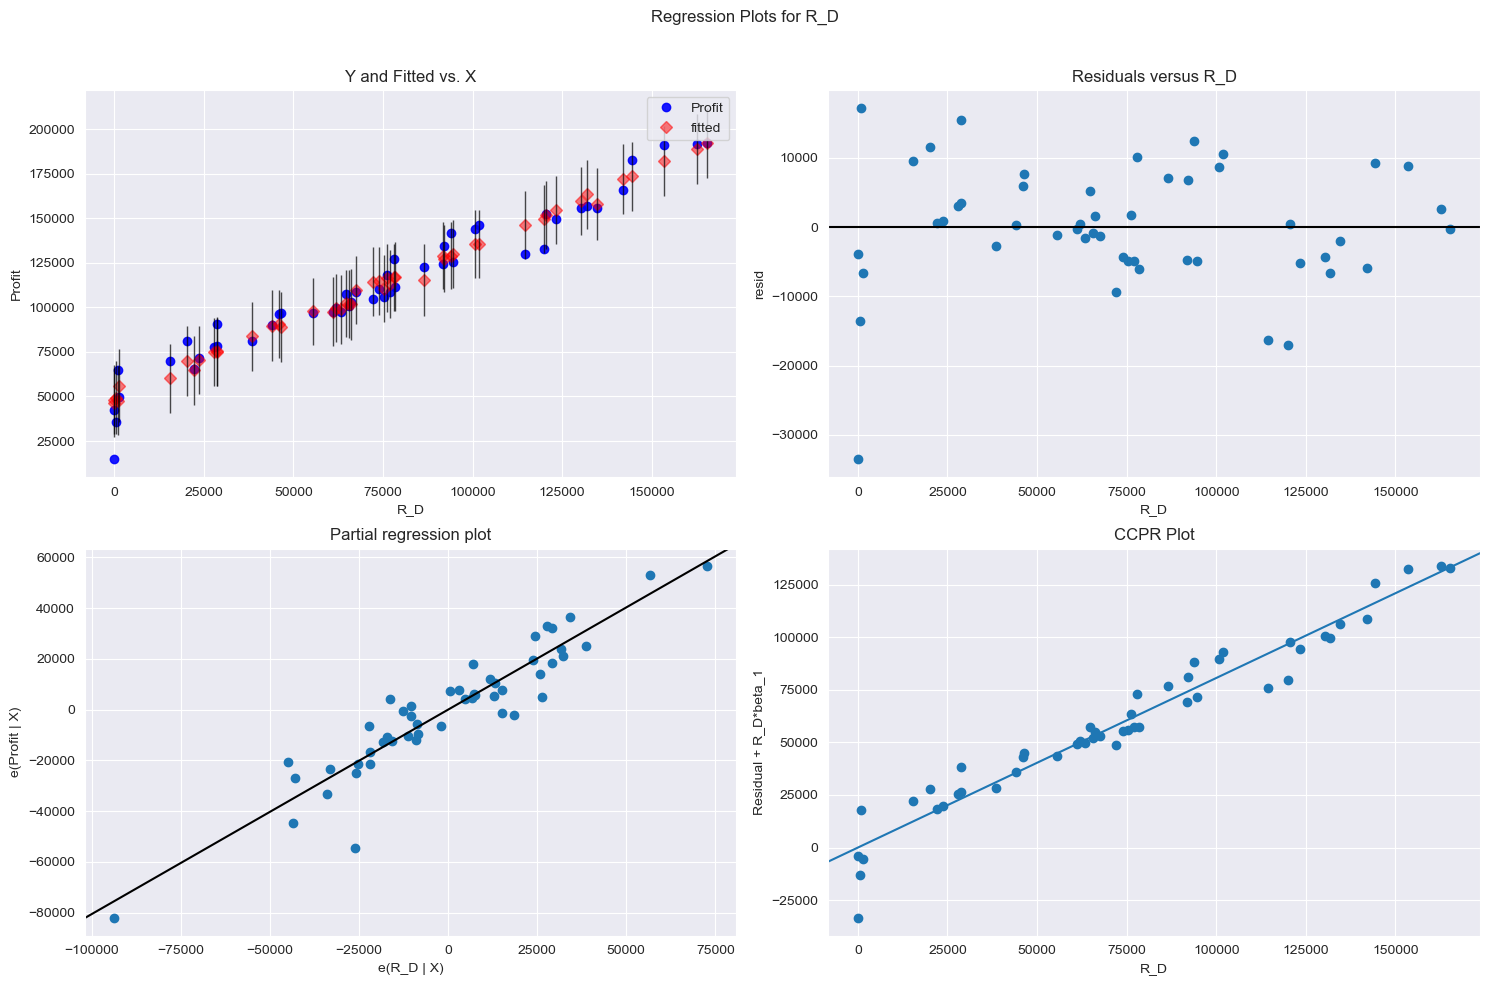

In [25]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'R_D',fig=fig)
plt.show()

eval_env: 1


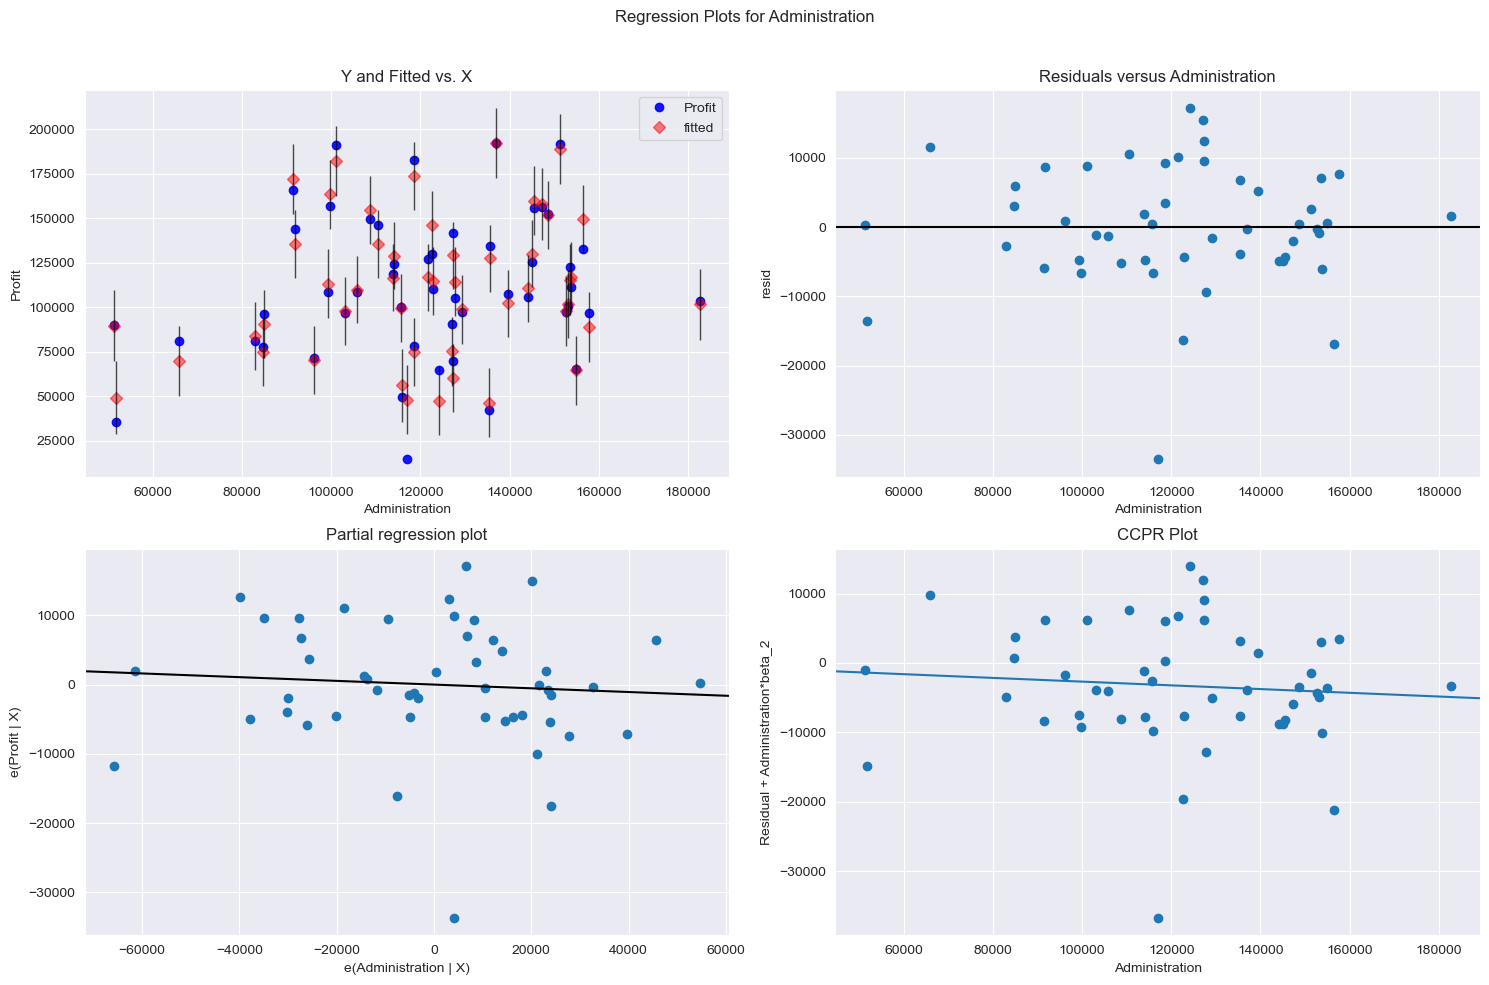

In [26]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


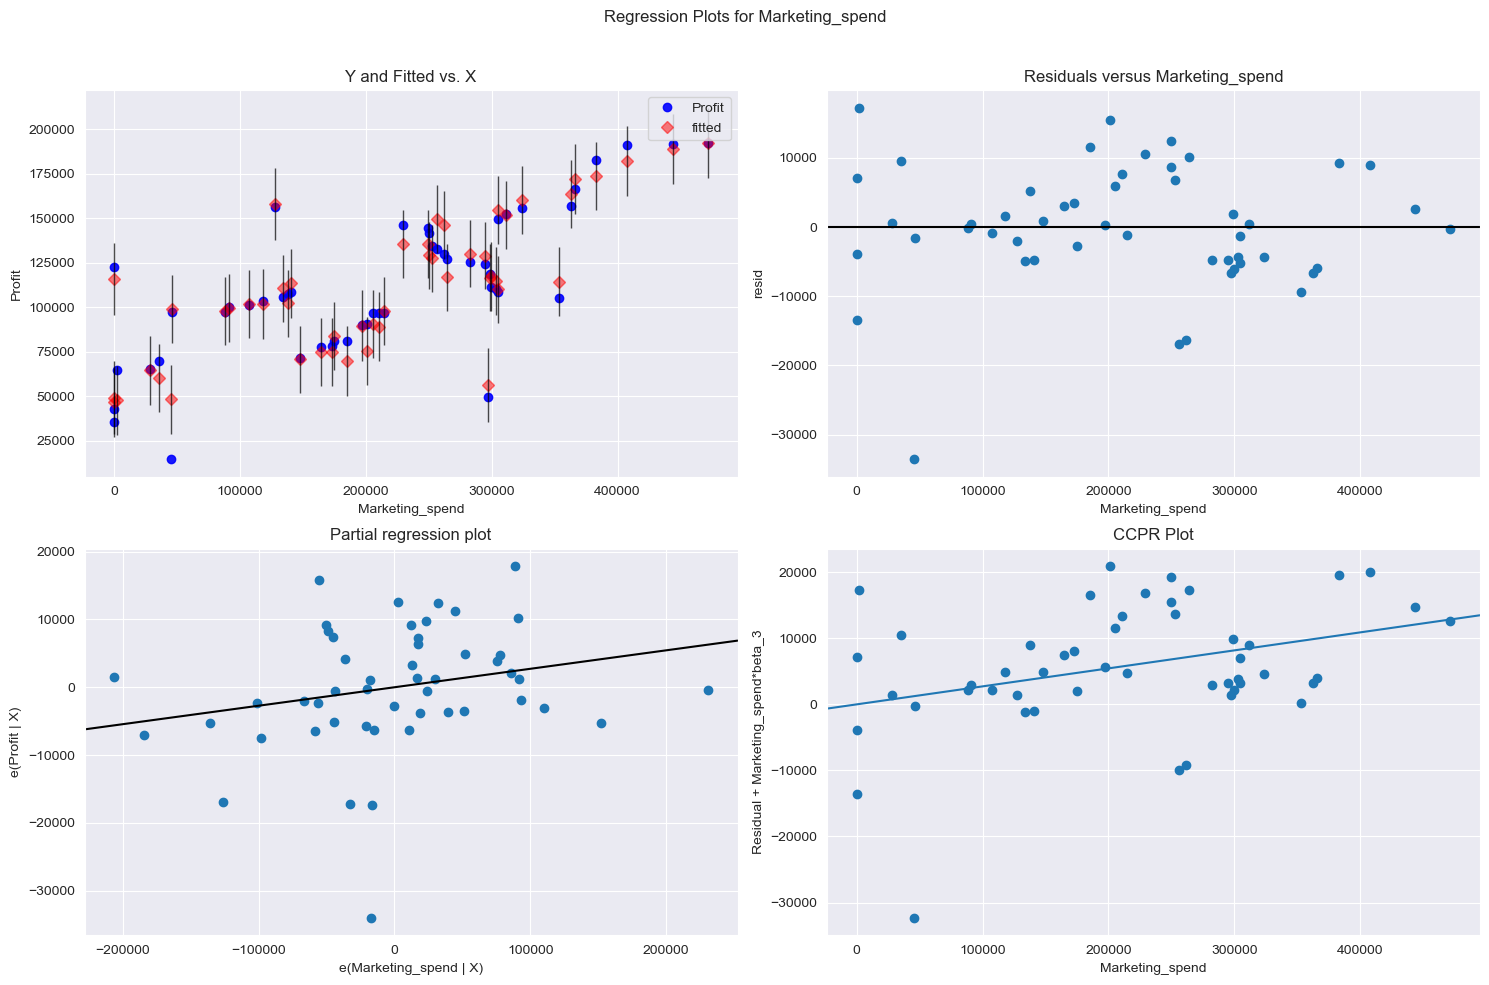

In [27]:
fig=plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Marketing_spend',fig=fig)
plt.show()

In [28]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

In [29]:
K=3
N=50
C=3*(K+1)/N
C

0.24

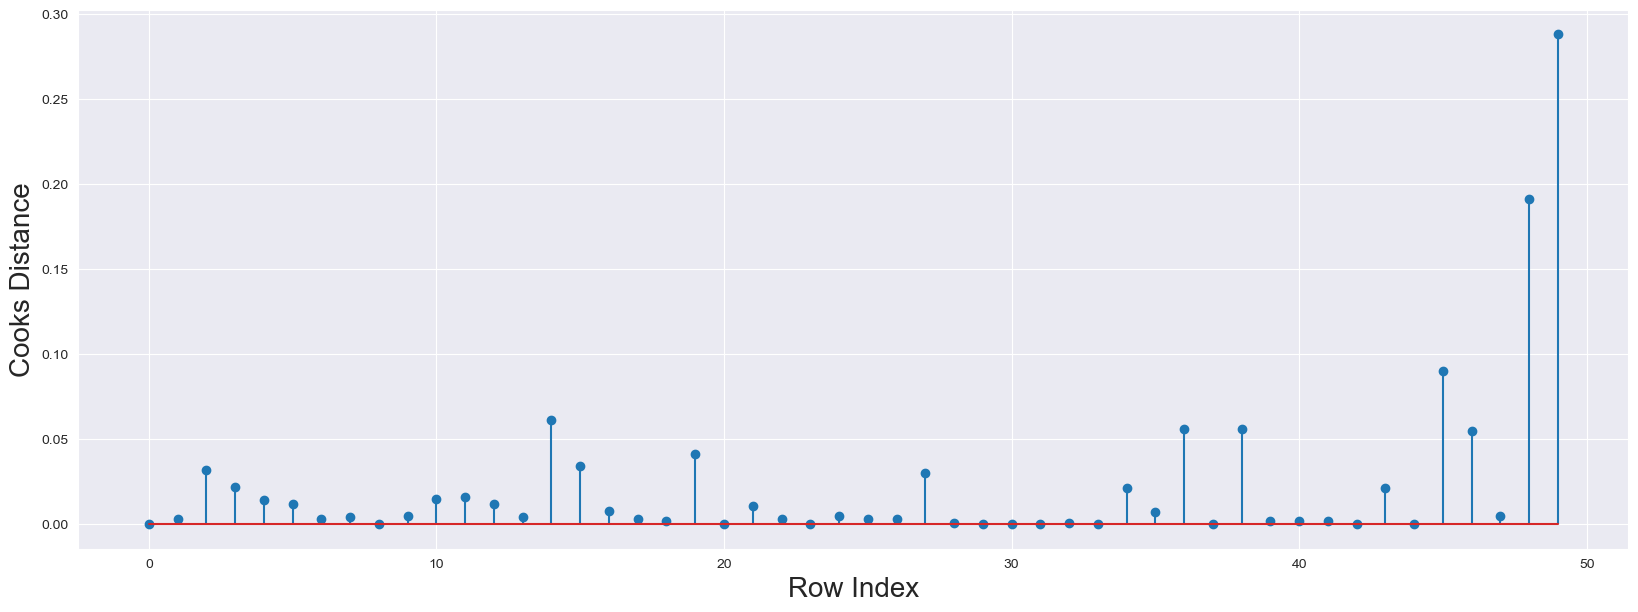

In [30]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startups)),np.round(c,3))
plt.xlabel('Row Index',size=20)
plt.ylabel('Cooks Distance',size=20)
plt.show()

In [31]:
np.where(c>0.24)

(array([49], dtype=int64),)

In [32]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [33]:
df_new=df.drop(df.index[[49]],axis=0).reset_index()
df_new.tail()
df_2=df_new.rename({'R&D Spend':'R_D','Marketing Spend':'Marketing_spend'},axis=1)

In [34]:
final_model=smf.ols('Profit~R_D+Marketing_spend',data=df_2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.74e-33
Time:                        20:22:41   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
R_D                 0.7754      0.035     22.136      0.000       0.705       0.846
Marketing_spend     0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
d2={"Models":['Basic Model','Final Model'],"R Squared":[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
print(table)

        Models  R Squared
0  Basic Model   0.950746
1  Final Model   0.961086


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [37]:
df_3=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
df_3.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [38]:
df_3.shape

(1436, 38)

In [39]:
df_4=df_3[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_4.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [40]:
df_4.shape

(1436, 9)

In [41]:
df_4.info

<bound method DataFrame.info of       Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]>

In [42]:
df_4.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [43]:
df=df_4.rename({'Age_08_04':'age','Quarterly_Tax':'tax'},axis=1)
df.head()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [44]:
df.corr()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [45]:
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:22:42   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
tax            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols('cc~age+KM+HP+Doors+Gears+tax+Weight',data=df).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~age+KM+HP+cc+Gears+tax+Weight',data=df).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~age+KM+HP+cc+Doors+tax+Weight',data=df).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_tax=smf.ols('tax~age+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
vif_tax=1/(1-rsq_tax)
rsq_weight=smf.ols('Weight~age+KM+HP+cc+Doors+Gears+tax',data=df).fit().rsquared
vif_weight=1/(1-rsq_weight)

In [47]:
d1={'variables':['age','KM','HP','cc','Doors','Gears','tax','Weight'],
    'vif':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_tax,vif_weight]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,vif
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,tax,2.311431
7,Weight,2.516420


Text(0.5, 1.0, 'Normal Q-Q Plot')

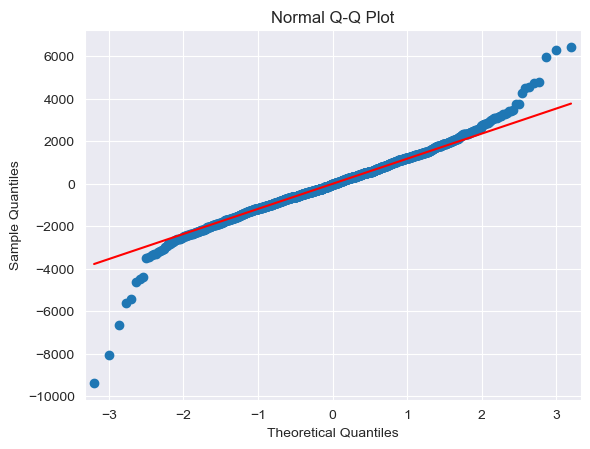

In [48]:
import statsmodels.api as sn
qqplot=sn.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot')

In [49]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

Text(0, 0.5, 'Standardized resid values')

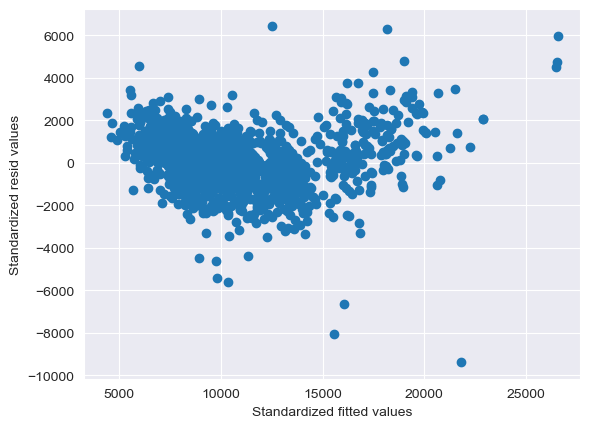

In [50]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized resid values')

eval_env: 1


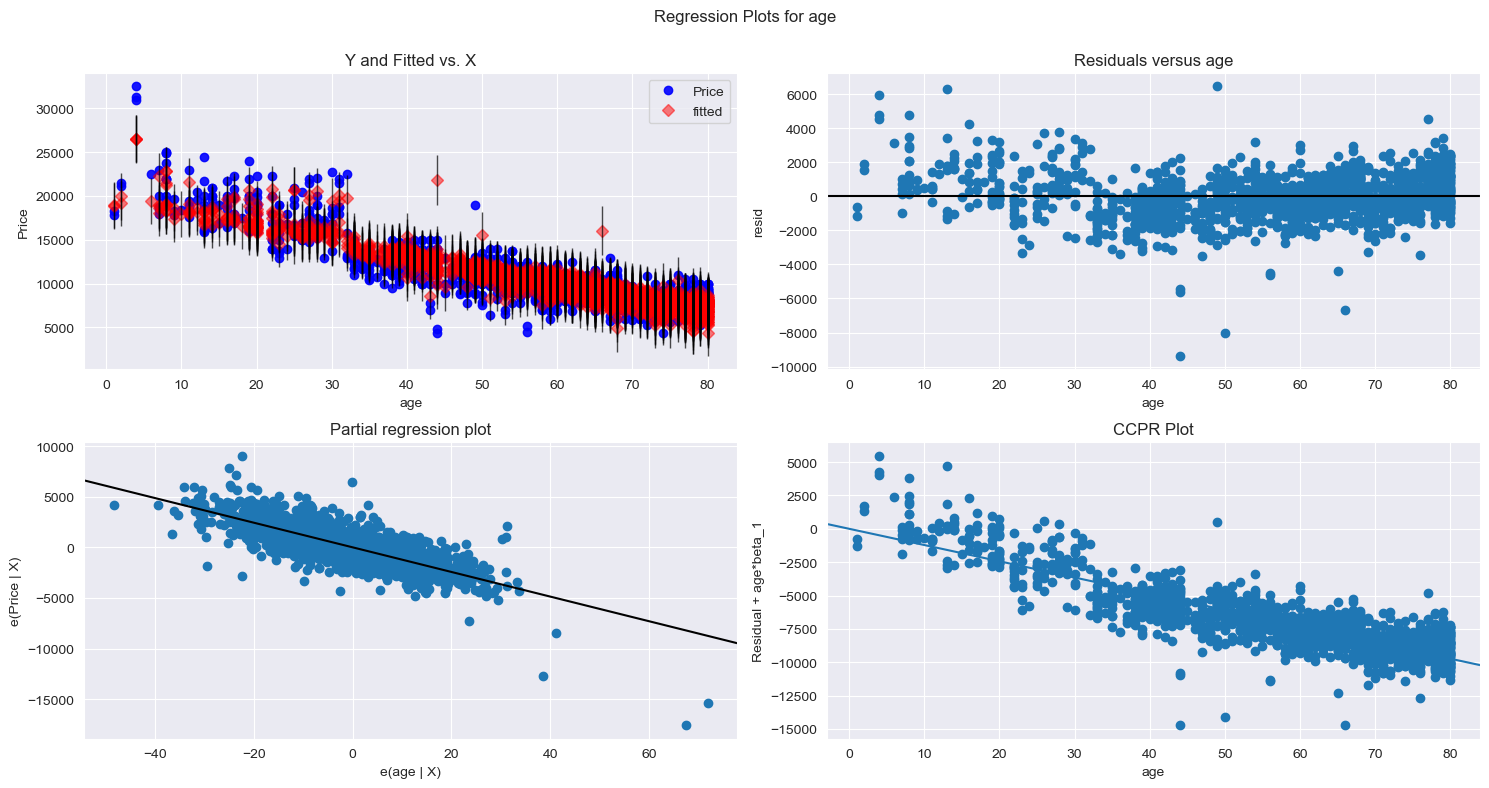

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


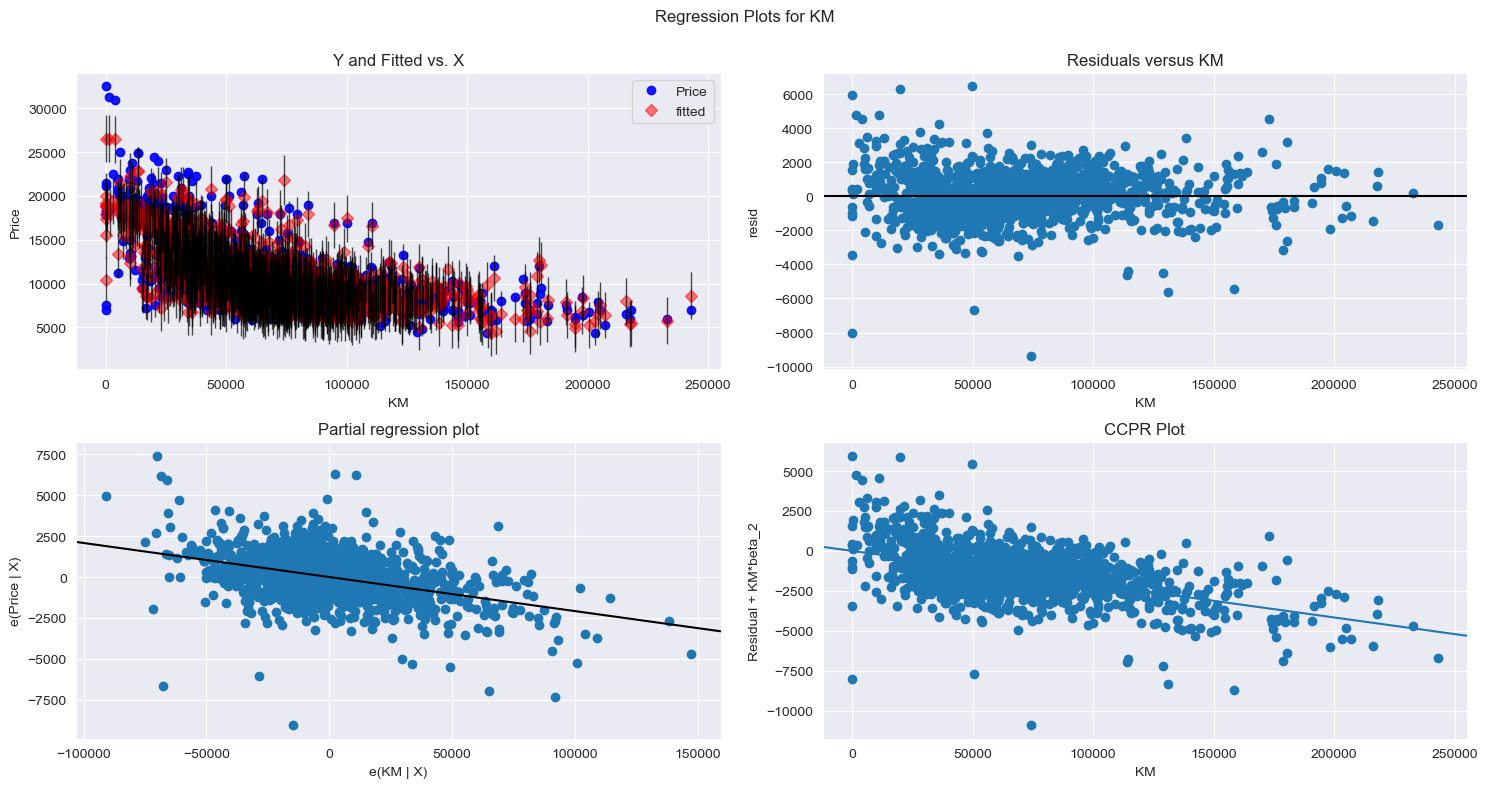

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


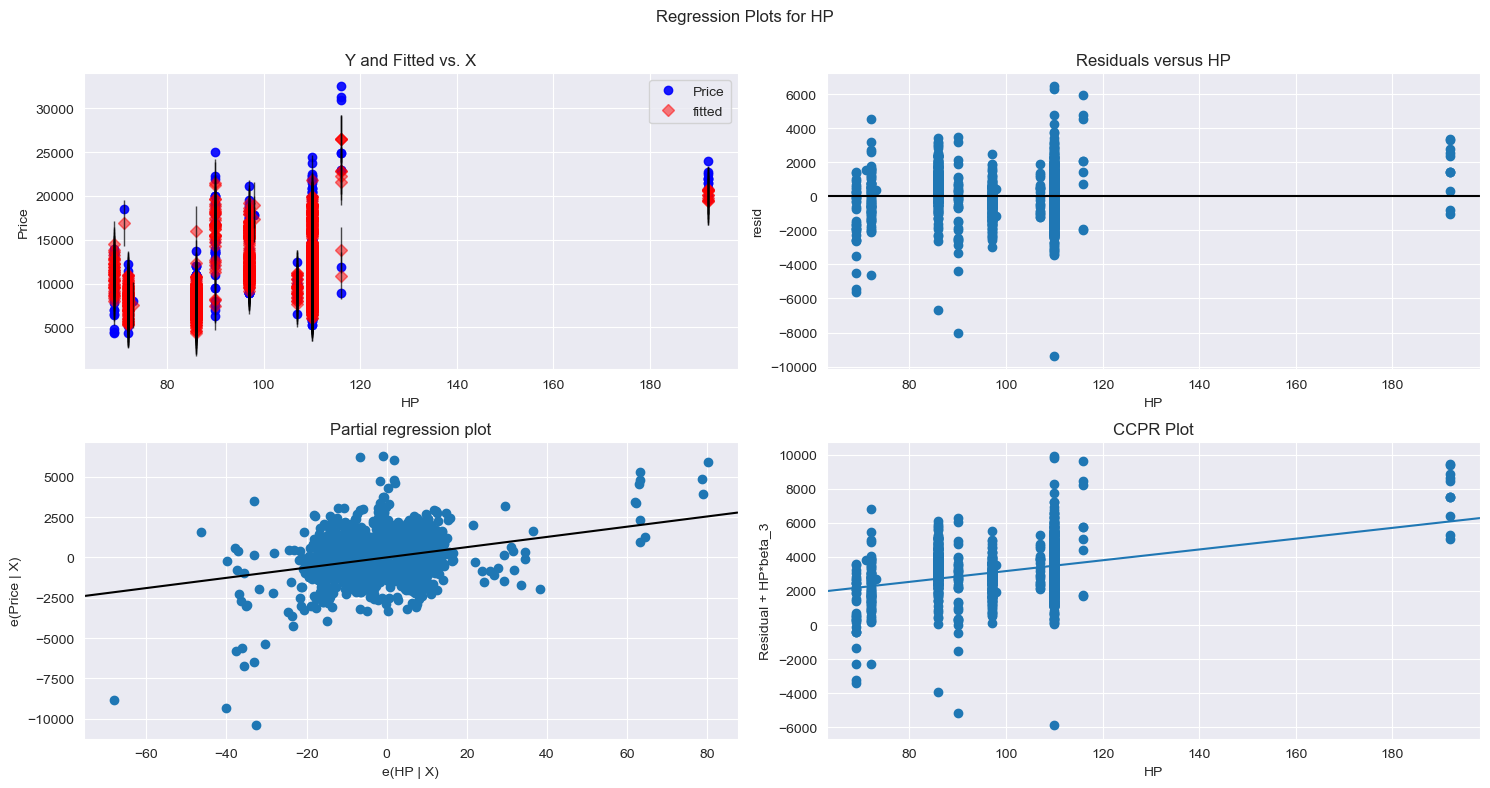

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


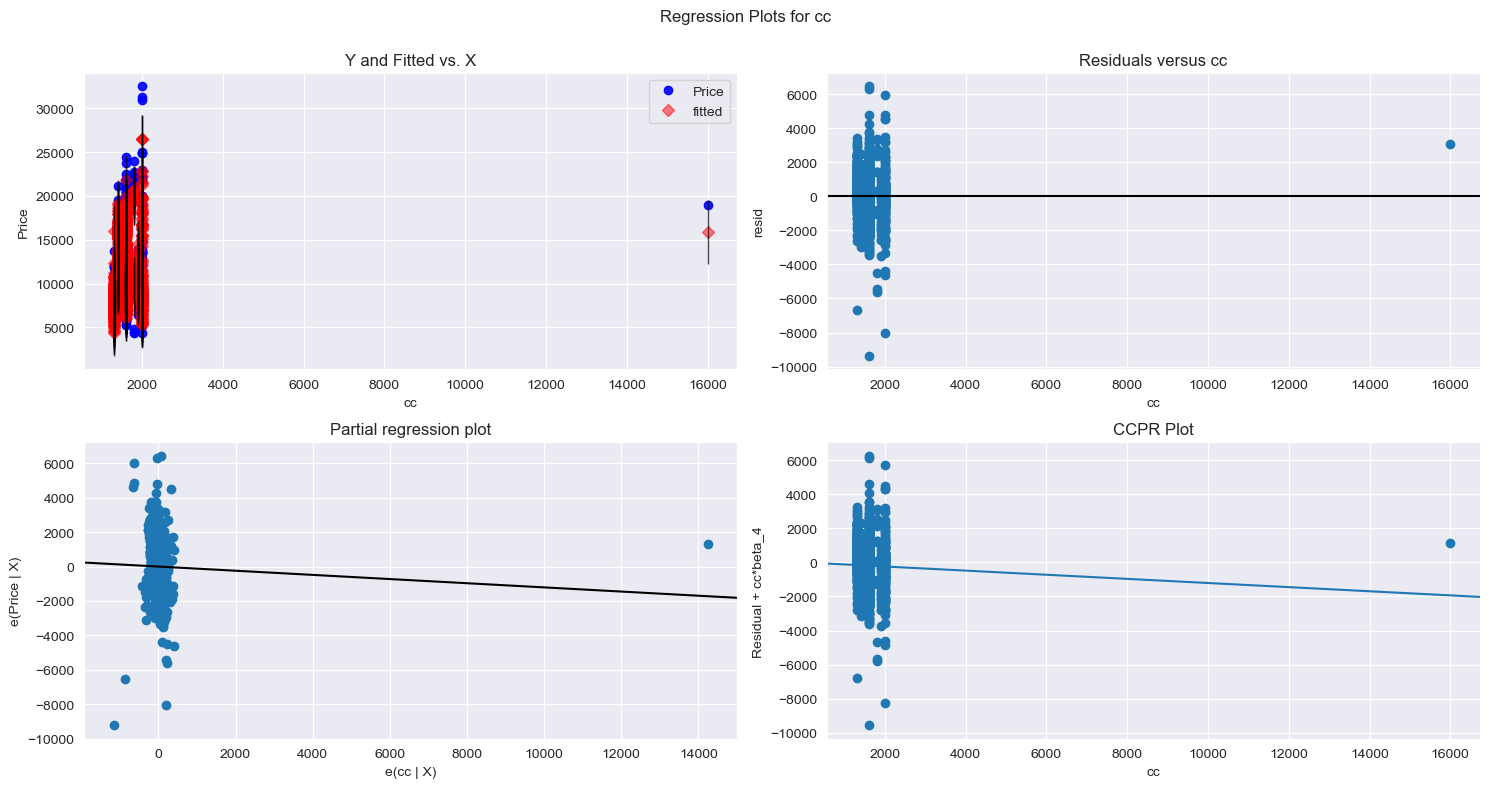

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


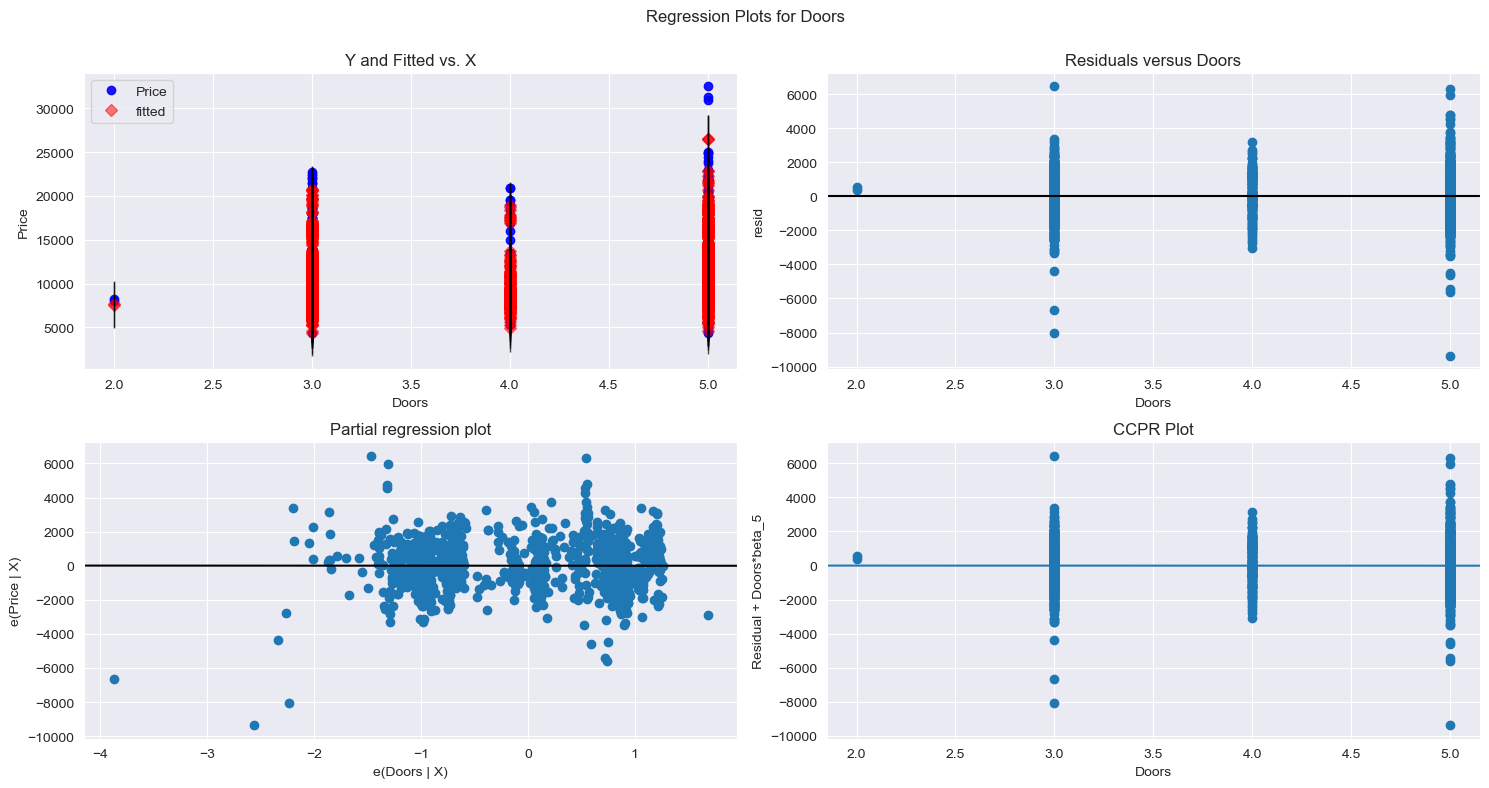

In [55]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


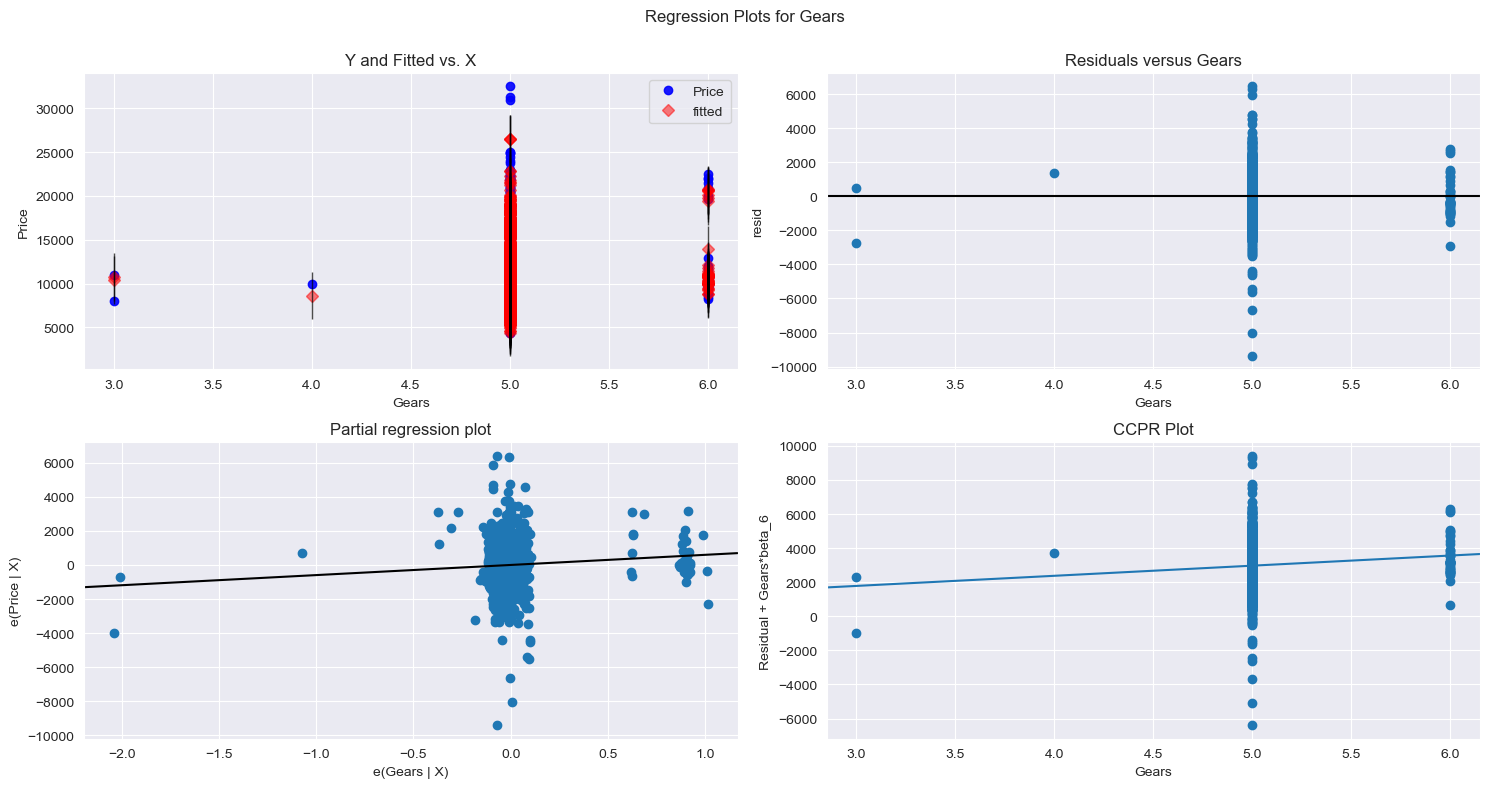

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


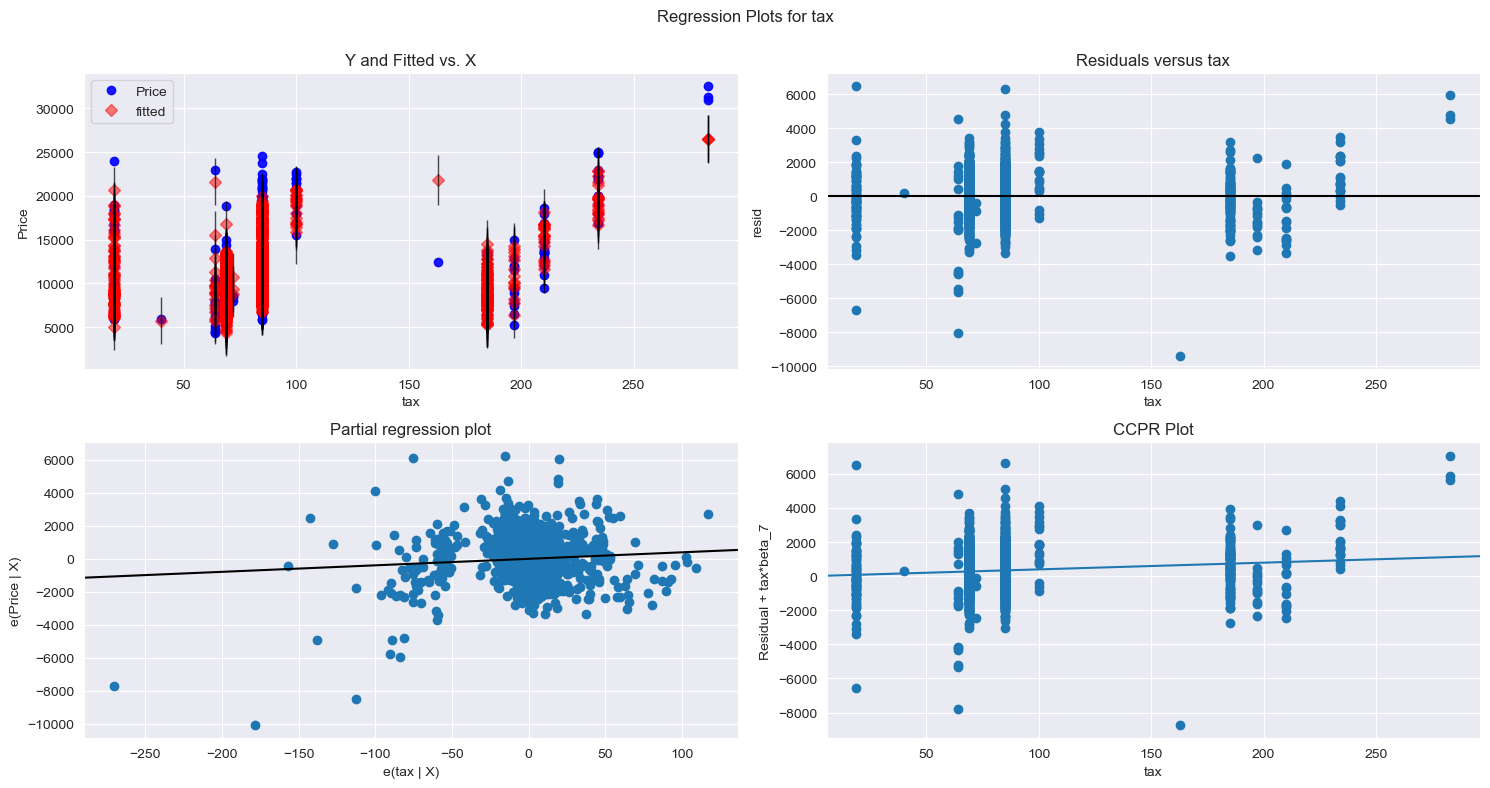

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'tax',fig=fig)
plt.show()

eval_env: 1


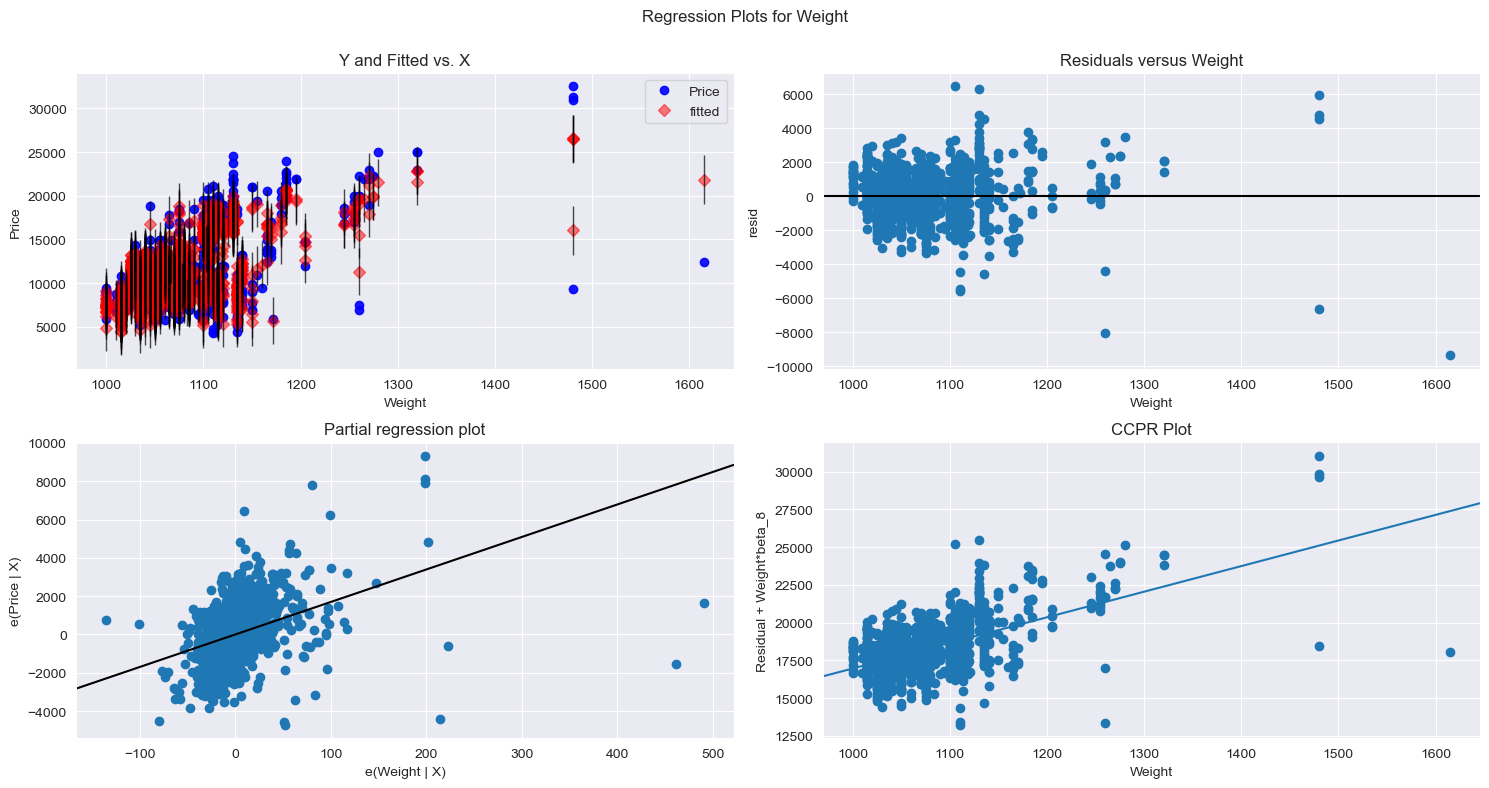

In [58]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [59]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

In [60]:
k=8
n=1436
C=3*(k+1)/n
C

0.018802228412256268

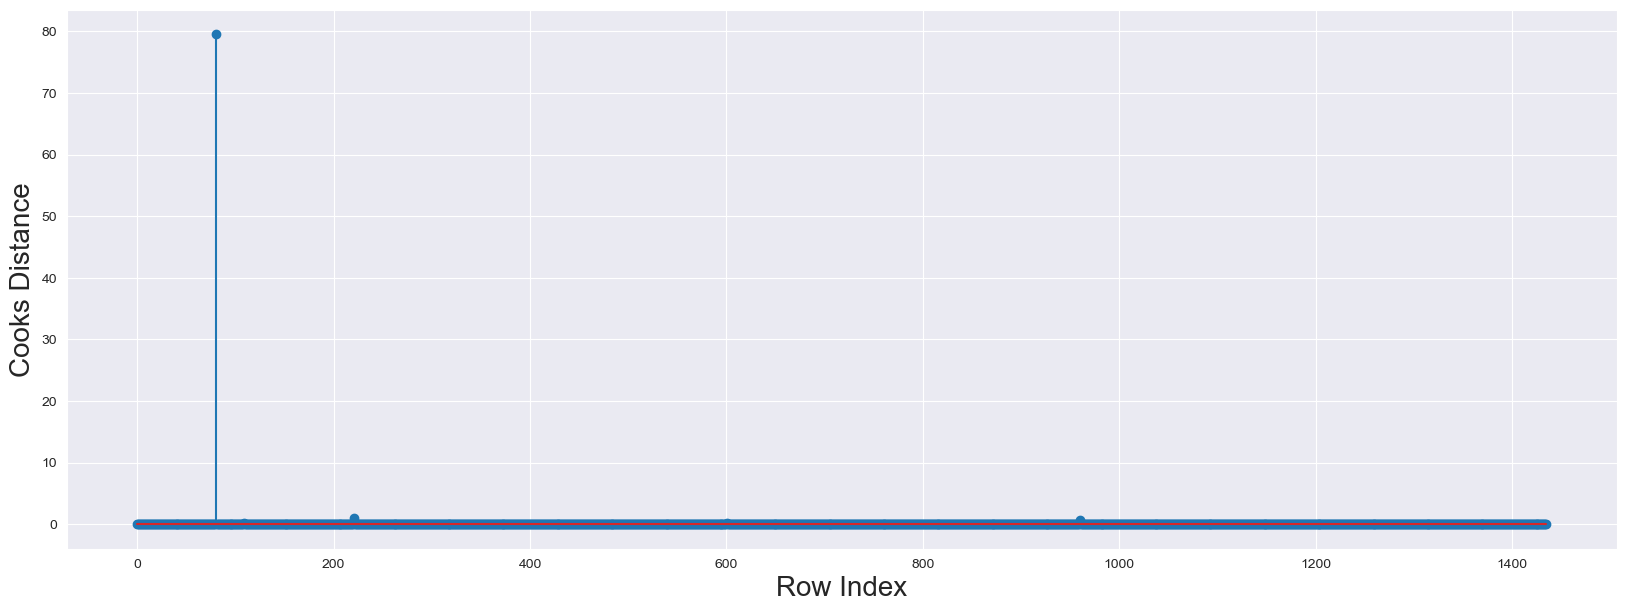

In [61]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_4)),np.round(c,3))
plt.xlabel('Row Index',size=20)
plt.ylabel('Cooks Distance',size=20)
plt.show()

In [62]:
(np.argmax(c),np.max(c))

(80, 79.52010624137654)

In [63]:
np.where(c>0.0188)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

In [66]:
new_data=df.drop(df.index[[14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,523,  601,  654,  960,  991, 1058]],axis=0).reset_index()
new_data.head(2)

,index,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165


In [69]:
final_model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+tax+Weight',data=new_data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:04:29   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP            28.9815      2.768     10.472      0.000      23.552      34.410
cc            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
tax            2.1111      1.358      1.555      0.120      -0.553       4.775
Weight        31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""